In [6]:
import numpy as np

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import OneHotEncoder

iris = load_iris()

In [17]:
X, y = iris.data, iris.target
enc = OneHotEncoder()
y= enc.fit_transform(y[:, np.newaxis]).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
X.shape, y.shape

((150L, 4L), (150L, 3L))

In [14]:
# Implement Model in Keras
model = Sequential()
model.add(Dense(X.shape[1], 10, init='uniform', activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(10, 10, init='uniform', activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(10, y.shape[1], init='uniform', activation='softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

In [15]:
# Compile the model using theano
model.compile(loss='categorical_crossentropy', optimizer=sgd)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '2696' (I am process '4888')
INFO (theano.gof.compilelock): Refreshing lock C:\Users\Shubhanshu\AppData\Local\Theano\compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-2.7.9-64\lock_dir\lock
INFO:theano.gof.compilelock:Refreshing lock C:\Users\Shubhanshu\AppData\Local\Theano\compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-2.7.9-64\lock_dir\lock
INFO (theano.gof.compilelock): Refreshing lock C:\Users\Shubhanshu\AppData\Local\Theano\compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-2.7.9-64\lock_dir\lock
INFO:theano.gof.compilelock:Refreshing lock C:\Users\Shubhanshu\AppData\Local\Theano\compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-2.7.9-64\lock_dir\lock
INFO (theano.gof.compilelock): Refreshing lock C:\Users\Shubhanshu\AppData\Local\Theano\compiledir_Windows-8-6.2.9200-Intel64_Family_6_Mod

In [191]:
from sklearn import cross_validation
#print model.get_weights()
model.set_weights(np.array([np.random.uniform(size=k.shape) for k in model.get_weights()]))
print model.to_yaml()
model.optimizer.lr = 0.01
model.optimizer.decay = 0.
model.optimizer.momentum = 0.
model.optimizer.nesterov = False

class_mode: categorical
layers:
- {W_constraint: null, W_regularizer: null, activation: tanh, activity_regularizer: null,
  b_constraint: null, b_regularizer: null, init: uniform, input_dim: !!python/long '4',
  name: Dense, output_dim: 10}
- {name: Dropout, p: 0.5}
- {W_constraint: null, W_regularizer: null, activation: tanh, activity_regularizer: null,
  b_constraint: null, b_regularizer: null, init: uniform, input_dim: 10, name: Dense,
  output_dim: 10}
- {name: Dropout, p: 0.5}
- {W_constraint: null, W_regularizer: null, activation: softmax, activity_regularizer: null,
  b_constraint: null, b_regularizer: null, init: uniform, input_dim: 10, name: Dense,
  output_dim: !!python/long '3'}
loss: categorical_crossentropy
name: Sequential
optimizer: {decay: 1.0e-06, lr: 0.5, momentum: 0.9, name: SGD, nesterov: true}
theano_mode: null

class_mode: categorical
layers:
- {W_constraint: null, W_regularizer: null, activation: tanh, activity_regularizer: null,
  b_constraint: null, b_regulariz

In [212]:
# Perform cross validated training

kf = cross_validation.KFold(X.shape[0], n_folds=10, shuffle=True)
scores = []
for train_index, test_index in kf:
    model.fit(X[train_index], y[train_index], nb_epoch=100, batch_size=200, verbose=0)
    scores.append(model.evaluate(X[test_index], y[test_index], show_accuracy=1))
print scores
print np.mean(np.array(scores), axis=0)

15/15 [==============================] - 0s
[[0.64734703302383423, 0.53333333333333333], [0.45346134901046753, 0.53333333333333333], [0.29287645220756531, 0.66666666666666663], [0.32459428906440735, 0.73333333333333328], [0.51766085624694824, 0.53333333333333333], [0.32455170154571533, 0.73333333333333328], [0.55586755275726318, 0.53333333333333333], [0.5674089789390564, 0.46666666666666667], [0.46634158492088318, 0.59999999999999998], [0.55486667156219482, 0.59999999999999998]]
[ 0.47049765  0.59333333]


In [205]:
print model.predict_classes(X[test_index]), np.argmax(y[test_index], axis=1)

15/15 [==============================] - 0s
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1] [0 0 0 0 0 0 1 1 1 1 2 2 2 2 2]


In [43]:
logit = Sequential()
logit.add(Dense(X.shape[1], y.shape[1], init='uniform', activation='softmax'))
logit_sgd = SGD()

In [44]:
logit.compile(loss='categorical_crossentropy', optimizer=logit_sgd)

INFO (theano.gof.compilelock): Refreshing lock C:\Users\Shubhanshu\AppData\Local\Theano\compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-2.7.9-64\lock_dir\lock
INFO:theano.gof.compilelock:Refreshing lock C:\Users\Shubhanshu\AppData\Local\Theano\compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-2.7.9-64\lock_dir\lock
INFO (theano.gof.compilelock): Refreshing lock C:\Users\Shubhanshu\AppData\Local\Theano\compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-2.7.9-64\lock_dir\lock
INFO:theano.gof.compilelock:Refreshing lock C:\Users\Shubhanshu\AppData\Local\Theano\compiledir_Windows-8-6.2.9200-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-2.7.9-64\lock_dir\lock


In [60]:
kf = cross_validation.KFold(X.shape[0], n_folds=10)
for train_index, test_index in kf:
    logit.fit(X[train_index], y[train_index], nb_epoch=10000, batch_size=200, verbose=0)
    scores.append(logit.evaluate(X[test_index], y[test_index], show_accuracy=1)[1])
print scores
print np.mean(scores)

15/15 [==============================] - 0s
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 1.0, 1.0, 0.80000000000000004, 1.0, 1.0, 1.0, 1.0, 1.0, 0.80000000000000004, 0.80000000000000004, 1.0, 1.0, 0.73333333333333328, 1.0, 1.0, 1.0, 1.0, 1.0, 0.80000000000000004, 0.8666666666666667, 1.0, 1.0, 0.73333333333333328, 1.0, 1.0, 1.0, 1.0, 1.0, 0.80000000000000004, 0.8666666666666667, 1.0, 1.0, 0.73333333333333328, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8666666666666667, 0.8666666666666667, 1.0, 1.0, 0.80000000000000004, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8666666666666667, 0.8666666666666667, 1.0, 1.0, 0.80000000000000004, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8666666666666667, 0.8666666666666667, 1.0, 1.0, 0.80000000000000004, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8666666666666667, 0.8666666666666667, 1.0, 1.0, 0.8666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8666666666666667, 0.93333333333333335, 1.0, 1.0, 0.80000000000000004, 1.0, 1.0, 1.0, 1.0, 1.0,

In [76]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

4277/4277 [==============================] - 0s     


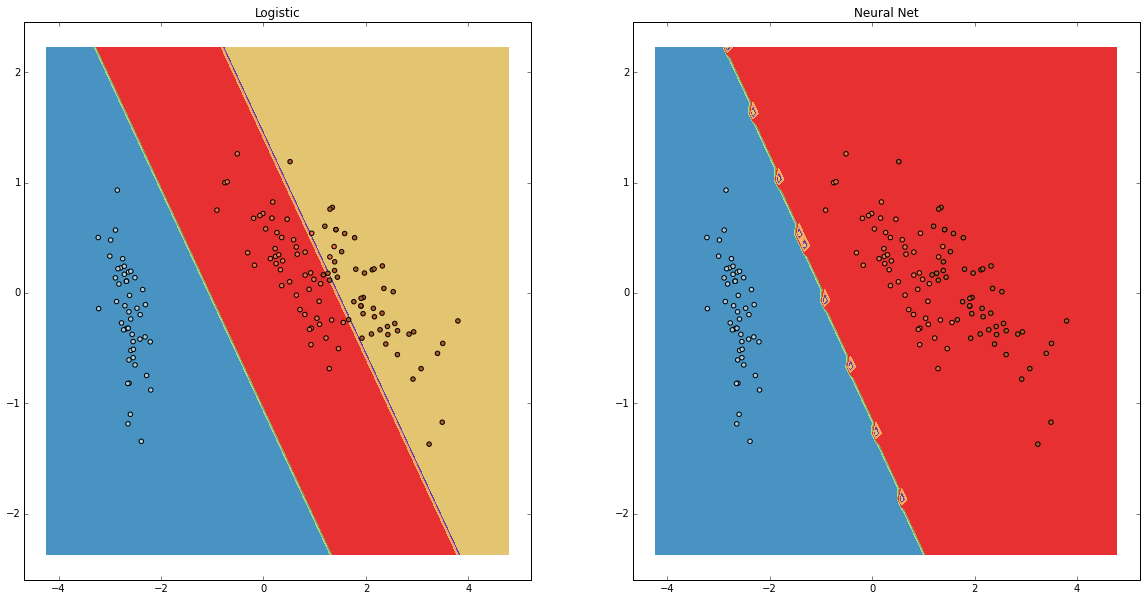

In [211]:
pca = PCA(n_components=2)
X_t = pca.fit_transform(X)

h = 0.1
x_min, x_max = X_t[:, 0].min() - 1, X_t[:, 0].max() + 1
y_min, y_max = X_t[:, 1].min() - 1, X_t[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig, ax = plt.subplots(1,2, figsize=(20,10))
for i, v in enumerate({"Neural Net": model, "Logistic": logit}.items()):
    # here "model" is your model's prediction (classification) function
    Z = v[1].predict_classes(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])) 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    ax[i].contourf(xx, yy, Z, cmap=plt.cm.Paired)
    #ax[i].set_axis('off')
    # Plot also the training points
    ax[i].scatter(X_t[:, 0], X_t[:, 1], c=np.argmax(y, axis=1), cmap=plt.cm.Paired)
    ax[i].set_title(v[0])


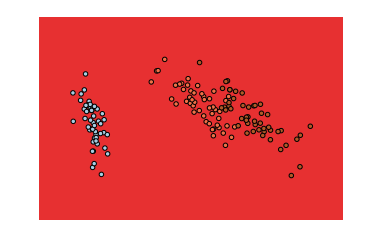

In [143]:
np.random.uniform?